<a href="https://colab.research.google.com/github/anishdulal/Linear-Regression/blob/master/LinearRegression_28th_feb_absent_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First Step

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#open('/content/gdrive/My Drive/Price.csv')
price1 = pd.read_csv(open('/content/gdrive/My Drive/Price.csv'))
#price1 = pd.read_csv('Price.csv')

In [0]:
#Renaming title of columns
price = price1.rename(columns ={'कृषि उपज':'Name','ईकाइ':'Unit','न्यूनतम':'Min','अधिकतम':'Max','औसत':'Avg'})

def convert_value(column): #converting nepali numerical data into integers.
    r = []
    for i in column:
        #print(i)
        r.append(int(i))
    return r

price['Min'] = convert_value(price['Min'].tolist())
price['Max'] = convert_value(price['Max'].tolist())
price['Avg'] = convert_value(price['Avg'].tolist())

import datetime

price['cdate']=pd.to_datetime(price['cdate'])

dfw = price[price['pricetype'] == 'W']
dfr = price[price['pricetype'] == 'R']

In [5]:
dfr = dfr.reset_index()
dfr = dfr.set_index('cdate')
dfr.drop('index',axis=1, inplace = True)
dfr.head()

,Name,Unit,Min,Max,Avg,pricetype
cdate,,,,,,
2018-02-25,गोलभेडा ठूलो(नेपाली),के.जी.,40,50,45,R
2018-02-25,गोलभेडा सानो,के.जी.,40,50,45,R
2018-02-25,अालु रातो,के.जी.,35,40,38,R
2018-02-25,अालु सेतो,के.जी.,30,35,33,R
2018-02-25,प्याज सुकेको भारतीय,के.जी.,60,70,65,R


## Second Step

In [6]:
price.head()

,Name,Unit,Min,Max,Avg,cdate,pricetype
0,गोलभेडा ठूलो(नेपाली),के.जी.,30,35,33,2018-02-25,W
1,गोलभेडा सानो,के.जी.,25,30,28,2018-02-25,W
2,अालु रातो,के.जी.,20,23,22,2018-02-25,W
3,अालु सेतो,के.जी.,18,20,19,2018-02-25,W
4,प्याज सुकेको भारतीय,के.जी.,44,46,45,2018-02-25,W


In [0]:
vegetable = set(price['Name'].values) #taking all the unique vegetables
len(vegetable)

feature_df = [] #list

for v in vegetable:
  for p_type in ['W','R']:

    df_v = price[(price['Name'] == v) & (price['pricetype']== p_type)] #taking a vegetable of only one pricetype
    df_v = df_v.sort_values(by = ['cdate'], ascending = False) #sorting in descending order based on date. Recent date will be at first.

    if p_type == 'W':
      df_v['type'] = 1
    else:
      df_v['type'] = 0
    
    df_v['t_1'] = df_v.shift(-1)['Avg']
    df_v['t_2'] = df_v.shift(-2)['Avg']

    feature_df.append(df_v)


In [0]:
feature_df = pd.concat(feature_df)

In [9]:
feature_df.tail()

,Name,Unit,Min,Max,Avg,cdate,pricetype,type,t_1,t_2
58861,कुरीलो,के.जी.,350,350,350,2019-05-31,R,0,305.0,290.0
58717,कुरीलो,के.जी.,300,310,305,2019-05-30,R,0,290.0,550.0
58586,कुरीलो,के.जी.,280,300,290,2019-05-29,R,0,550.0,550.0
23512,कुरीलो,के.जी.,500,600,550,2018-08-27,R,0,550.0,NaN
23393,कुरीलो,के.जी.,500,600,550,2018-08-26,R,0,NaN,NaN


In [10]:
feature_df.head()

,Name,Unit,Min,Max,Avg,cdate,pricetype,type,t_1,t_2
99207,खु्र्सानी हरियो,के.जी.,50,60,55,2020-02-15,W,1,55.0,58.0
99038,खु्र्सानी हरियो,के.जी.,50,60,55,2020-02-14,W,1,58.0,58.0
98874,खु्र्सानी हरियो,के.जी.,55,60,58,2020-02-13,W,1,58.0,55.0
98712,खु्र्सानी हरियो,के.जी.,55,60,58,2020-02-12,W,1,55.0,55.0
98551,खु्र्सानी हरियो,के.जी.,50,60,55,2020-02-11,W,1,55.0,55.0


In [11]:
feature_df.dropna(inplace=True)
feature_df.tail()

,Name,Unit,Min,Max,Avg,cdate,pricetype,type,t_1,t_2
59152,कुरीलो,के.जी.,340,350,345,2019-06-02,R,0,345.0,350.0
59006,कुरीलो,के.जी.,340,350,345,2019-06-01,R,0,350.0,305.0
58861,कुरीलो,के.जी.,350,350,350,2019-05-31,R,0,305.0,290.0
58717,कुरीलो,के.जी.,300,310,305,2019-05-30,R,0,290.0,550.0
58586,कुरीलो,के.जी.,280,300,290,2019-05-29,R,0,550.0,550.0


In [0]:
feature_df = feature_df.sample(frac = 1, random_state= 1)

In [13]:
X = feature_df[['type', 't_1', 't_2']].values #getting featrue matrix
X

array([[  0., 345., 345.],
       [  0.,  43.,  43.],
       [  0., 105.,  95.],
       ...,
       [  0.,  55.,  55.],
       [  0., 105., 105.],
       [  0.,  65.,  55.]])

In [14]:
X.shape

(98822, 3)

In [15]:
X = np.insert(X, 0, values=1, axis = 1) #adding bias or intercept term
X

array([[  1.,   0., 345., 345.],
       [  1.,   0.,  43.,  43.],
       [  1.,   0., 105.,  95.],
       ...,
       [  1.,   0.,  55.,  55.],
       [  1.,   0., 105., 105.],
       [  1.,   0.,  65.,  55.]])

In [16]:
y = feature_df['Avg'].values
print(y.shape)

(98822,)


## Dividing into train, test and validation datas

In [17]:
total = len(X)
train = int(0.6 * total)
val = int(0.2*total)

X_train = X[:train]
y_train = y[:train].reshape(-1,1)

X_val = X[train:train + val]
y_val = y[train:train +val].reshape(-1,1)

X_test = X[train + val:]
y_test = y[train + val:].reshape(-1,1)

print(len(X_train), len(X_val),len(X_test))

59293 19764 19765


## Normalization
Min-max

In [18]:
#To cope with convergence problem during gradient descent, we take all our features into same range. 
X_train 

array([[  1.,   0., 345., 345.],
       [  1.,   0.,  43.,  43.],
       [  1.,   0., 105.,  95.],
       ...,
       [  1.,   1., 115., 115.],
       [  1.,   1.,  95.,  95.],
       [  1.,   1.,  38.,  38.]])

In [0]:
price_X = X_train[:, 1:]

min_v = np.min(price_X)
max_v = np.max(price_X)
diff = max_v - min_v

In [0]:
def min_max_normalization(dataset):
  for i in range(0, dataset.shape[0]):
    for j in range(0, dataset.shape[1]):
      dataset[i][j] = (dataset[i][j]-min_v)/diff

min_max_normalization(X_train)
min_max_normalization(X_val)
min_max_normalization(X_test)

## Regression Model

In [0]:
np.random.seed(42)
theta = np.random.rand(4,1)
def ComputeCost(X_train, y_train, theta):
  m = len(X_train)
  J = (1/(2*m))*np.sum(np.square(np.dot(X_train,theta)-y_train))
  return J

In [22]:
X_train

array([[0.00061538, 0.        , 0.21230769, 0.21230769],
       [0.00061538, 0.        , 0.02646154, 0.02646154],
       [0.00061538, 0.        , 0.06461538, 0.05846154],
       ...,
       [0.00061538, 0.00061538, 0.07076923, 0.07076923],
       [0.00061538, 0.00061538, 0.05846154, 0.05846154],
       [0.00061538, 0.00061538, 0.02338462, 0.02338462]])

In [23]:
theta.shape

(4, 1)

In [24]:
X_train.shape

(59293, 4)

In [25]:
y_train.shape

(59293, 1)

In [26]:
len(X_train)

59293

In [27]:
theta

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848]])

In [28]:
X_train[:,0]

array([0.00061538, 0.00061538, 0.00061538, ..., 0.00061538, 0.00061538,
       0.00061538])

In [29]:
ComputeCost(X_train,y_train, theta)

9043.501901609246

In [30]:
s = [2,1,5,7,3]
s[1] =10
s

[2, 10, 5, 7, 3]

In [0]:
def gradientDescent(X_train, y_train, theta, alpha, no_of_iterations):
  m = len(X_train)
  lossAtTrain =list()
  np.random.seed(42)
  theta = np.random.rand(4,1)
  for i in range(no_of_iterations):
    error = np.dot(X_train, theta) - y_train #(59293, 4) * (4, 1) = (59293,1)
    #temp0 = theta[0] - (alpha /m) * np.dot(error.T,X_train[:,0])
    #temp1 = theta[1] - ( alpha /m ) * np.dot(error.T,X_train[:,1])
    #temp2 = theta[2] - (alpha /m) * np.dot(error.T,X_train[:,2])
    #temp3 = theta[3] - ( alpha /m ) * np.dot(error.T,X_train[:,3])
    
    #theta[0] = temp0
    #theta[1] = temp1
    #theta[2] = temp2
    #theta[3] = temp3

    theta = theta - (alpha/m) * np.dot(X_train.T, error) #(4, 59293) * (59293,1) = (4,1)

    lossAtTrain.append(ComputeCost(X_train,y_train, theta))
   # print(theta)
  return theta,lossAtTrain

[[  6.67305898]
 [  3.70966834]
 [894.96554226]
 [722.47339562]]
[8825.386106236945, 8612.602291226338, 8405.020112424467, 8202.512412036403, 8004.955140732387, 7812.227281659132, 7624.210776308724, 7440.790452199704, 7261.85395232605, 7087.291666330807, 6916.996663362272, 6750.864626571507, 6588.793789211138, 6430.684872296268, 6276.441023789295, 6125.967759271422, 5979.172904064479, 5835.966536767631, 5696.260934174365, 5559.970517536023, 5427.011800138969, 5297.303336163262, 5170.765670791512, 5047.321291537383, 4926.8945807638775, 4809.411769362367, 4694.800891563965, 4582.991740855575, 4473.915826973584, 4367.50633394891, 4263.698079177623, 4162.427473492172, 4063.632482208641, 3967.25258712628, 3873.2287494559546, 3781.5033736548594, 3692.0202721452956, 3604.724630895943, 3519.562975844514, 3436.4831401412303, 3355.4342321930617, 3276.3666044891397, 3199.231823188262, 3123.982638449852, 3050.572955490197, 2978.957806346238, 2909.0933223296242, 2840.936707154127, 2774.446210719995

Text(0, 0.5, 'Training Error')

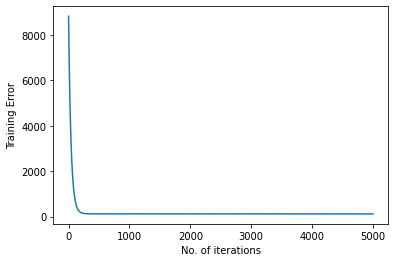

In [32]:
theta,lossAtTrain = gradientDescent(X_train, y_train, theta, alpha=0.9, no_of_iterations=5000)
print(theta)
print(lossAtTrain)
plt.plot(lossAtTrain)
plt.ticklabel_format(useOffset=False)
#plt.ylim(0,0.00003480487556)
plt.xlabel("No. of iterations")
plt.ylabel("Training Error")

In [33]:
theta.shape

(4, 1)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(59293, 4)
(59293, 1)
(19764, 4)
(19764, 1)
(19765, 4)
(19765, 1)


## Class ko Solution

In [0]:
np.random.seed(42)
#HyperParameter
#Beautify Code by creating dictionary containing all hyperparameters

train_error=[]

param={
    'num_of_iteration':1000,
    'learning_rate':0.1
}

grid_param={
    'num_of_iteration':[5000,2000],
    'learning_rate':[0.1,0.9]
}

def MSE(h,y):
    return 0.5*np.average((h-y)**2)


In [36]:
#Now a grid is to be created which contains the combination of num_of_iteration and learning_rate. 
#Hyper Parameter Tuning
#This combination is fed to the function and the combination with the best result is our final value of hyperparameters

import itertools
grid=list(itertools.product(grid_param['num_of_iteration'],grid_param['learning_rate']))
print(grid)

for g in grid:
    p={
    'num_of_iteration':g[0],
    'learning_rate':g[1]
    }

[(5000, 0.1), (5000, 0.9), (2000, 0.1), (2000, 0.9)]


[9043.501901609246, 8933.50165816172, 8826.190388084658, 8721.502358760928, 8619.373444455236, 8519.741087032742, 8422.544257637906, 8327.72341931015, 8235.220490513388, 8144.978809557119, 8056.943099887264, 7971.059436225486, 7887.275211536281, 7805.539104801559, 7725.801049583021, 7648.0122033530315, 7572.124917575216, 7498.09270851651, 7425.870228772656, 7355.413239489831, 7286.678583265323, 7219.624157710661, 7154.208889661035, 7090.392710015163, 7028.13652919022, 6967.402213176809, 6908.152560179264, 6850.351277826988, 6793.962960942938, 6738.953069855475, 6685.287909240496, 6632.9346074807245, 6581.8610965295975, 6532.036092267386, 6483.429075337551, 6436.010272451527, 6389.750638150565, 6344.62183701338, 6300.596226298796, 6257.646839012642, 6215.747367388657, 6174.872146773149, 6134.996139903669, 6096.094921571955, 6058.144663661831, 6021.122120552845, 5985.004614880747, 5949.770023646045, 5915.396764662163, 5881.863783334855, 5849.15053976485, 5817.236996165735, 5786.103604589

Text(0, 0.5, 'Training Error')

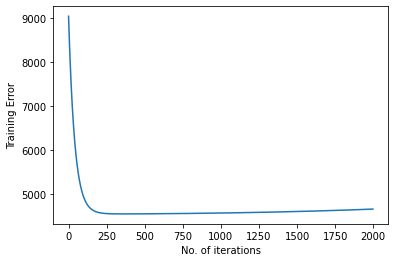

In [37]:
def train_model(X_train,y_train,X_val,y_val,param):
    np.random.seed(42)
    W=np.random.rand(X_train.shape[1]).reshape(-1,1)    #We reshape the row vector(1*4) to column vector(4*1)
    
    train_error=[]
    val_error=[]

    #Run the loop num_of_iteration times 
    for i in range(1,param['num_of_iteration']):
        h_train=np.matmul(X_train,W)        #h_train is matrix mul of X_train and W
        #sigmoid h_train = sigmoid(z= h_train)
        train_loss=MSE(h_train,y_train)     #loss in training data is calculated by calling MSE function
        #cross entropy
        train_error.append(train_loss)      #
        
        #Gradient-- Code form of the formula. shape[0] gives the number of rows
        gradient=np.matmul(np.transpose(h_train-y_train),X_train)/X_train.shape[0]    
            
        #W is the updated weight
        W=W-param['learning_rate']*gradient
    
    #Once training is done. We have to use Val set to tune hyper parameter. 
    #The p(combination) that gives least error is our final value for hyperparameters.
    h_val=np.matmul(X_val,W)# change
    val_loss=MSE(h_val,y_val) #change
    val_error.append(val_loss)
    return W, train_error, val_error
Weights, train_error, val_error = train_model(X_train,y_train,X_val,y_val,p)         

#Continue from here
print(train_error)
print('\n')                              
print(val_error)
plt.plot(np.arange(len(train_error)),train_error)
plt.xlabel("No. of iterations")
plt.ylabel("Training Error")
#plt.ylim(10**-5,10**-6)

In [0]:
for param in grid:
  def train_model(X_train,y_train,X_val,y_val,param):
      np.random.seed(42)
      W=np.random.rand(X_train.shape[1]).reshape(-1,1)    #We reshape the row vector(1*4) to column vector(4*1)
      print(W.shape)
      train_error=[]
      val_error=[]

      #Run the loop num_of_iteration times 
      for i in range(1,param['num_of_iteration']):
          h_train=np.matmul(X_train,W)        #h_train is matrix mul of X_train and W
          train_loss=MSE(h_train,y_train)     #loss in training data is calculated by calling MSE function
          train_error.append(train_loss)      #
          
          #Gradient-- Code form of the formula. shape[0] gives the number of rows
          gradient=np.matmul(X_train.T,(h_train-y_train))/X_train.shape[0]    
          #print(gradient.shape)
          #break   
          #W is the updated weight
          W=W-param['learning_rate']*gradient
          #print(gradient.shape)
          #break
      #Once training is done. We have to use Val set to tune hyper parameter. 
      #The p(combination) that gives least error is our final value for hyperparameters.
      h_val=np.matmul(X_val,W)
      val_loss=MSE(h_val,y_val)
      val_error.append(val_loss)
      return W, train_error, val_error

  W, train_error, val_error = train_model(X_train,y_train,X_val,y_val,p)         

  #Continue from here
  print(train_error)
  print('\n')                            #The code is incomplete.
  print(val_error)
  plt.plot(np.arange(len(train_error)),train_error)
  plt.xlabel("No. of iterations")
  plt.ylabel("Training Error")
  plt.show()
  print(param)

## March 2nd : R2 score for model evaluation

In [48]:
final_param = {'num_of_iteration' : 2000,'learning_rate': 0.9}
model_weights, train_error, val_error =  train_model(X_train,y_train,X_val,y_val,final_param)
len(model_weights)

(4, 1)


4

In [49]:
weights = np.array(model_weights)
y_mean = np.mean(y_test)
h_test = np.matmul(X_test, model_weights)
n = X_test.shape[0]
k = X_test.shape[1] - 1
SST = np.sum(np.square(y_test - y_mean))
SSR = np.sum(np.square(h_test- y_mean))
SSE = SST - SSR
print(SSE)
R2 = 1 - (SSE/(n-k-1))/(SST/(n-1))
R2

1811884.240614593


0.9859135479464923

In [50]:
X_test.shape,model_weights.shape,theta.shape,h_test.shape

((19765, 4), (4, 1), (4, 1), (19765, 1))

In [51]:
sse = np.sum(np.square(h_test - y_test))
sse

3030771.194324011